In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [323]:
paht_to_file = "/mnt/HC_Volume_18315164/home-jupyter/jupyter-natalija-fedorova--fa3d5/ВШЭ_2_семестр/final_games.csv"

In [324]:
df = pd.read_csv(paht_to_file)

In [325]:
df.shape

(140792, 32)

In [326]:
df.head(2)

,Game_ID,Rated,Variant,Speed,Created_At,Last_Move_At,Game_Status,Source,Winner,Opening_Name,...,Black_Inaccuracy,Black_Mistake,Black_Blunder,Black_ACPL,Clocks,Analysis,Total_Time_Init,Total_Time_Increment,Total_Time,Moves
0,PsevV6VH,True,standard,classical,2024-12-15T11:09:25.224000+00:00,2024-12-15T11:55:14.775000+00:00,resign,pool,white,English Opening: Symmetrical Variation,...,5,1,1,47,"[180003, 180003, 178499, 178019, 178339, 17757...","[{'eval': 14}, {'eval': 25}, {'eval': 26}, {'e...",1800,0,1800,Nf3 c5 c4 Nc6 Nc3 g6 e3 Bg7 d4 cxd4 exd4 d6 h3...
1,diLZa8sj,True,standard,classical,2024-10-28T13:54:16.605000+00:00,2024-10-28T14:32:21.403000+00:00,resign,pool,white,"French Defense: Winawer Variation, Advance Var...",...,4,0,1,31,"[180003, 180003, 179827, 179683, 178619, 17936...","[{'eval': 18}, {'eval': 28}, {'eval': 28}, {'e...",1800,0,1800,e4 e6 d4 d5 Nc3 Bb4 e5 Ne7 a3 Bxc3+ bxc3 b6 Bb...


In [327]:
df.shape

(140792, 32)

In [328]:
# Выберем 8 столбцов для анализа + дополнительно столбец Winner(необходим для анализа столбца 'Analysis') 

df_1 = df[['Game_ID','Variant', 'Speed', 'White_Mistake', 'Black_Mistake', 'White_Blunder', 'Black_Blunder', 'Analysis', 'Opening_ECO', 'Winner']]

In [329]:
df_1

,Game_ID,Variant,Speed,White_Mistake,Black_Mistake,White_Blunder,Black_Blunder,Analysis,Opening_ECO,Winner
0,PsevV6VH,standard,classical,1,1,1,1,"[{'eval': 14}, {'eval': 25}, {'eval': 26}, {'e...",A30,white
1,diLZa8sj,standard,classical,0,0,0,1,"[{'eval': 18}, {'eval': 28}, {'eval': 28}, {'e...",C16,white
2,O8TSZ7bq,standard,classical,1,1,4,5,"[{'eval': 17}, {'eval': 17}, {'eval': 11}, {'e...",A48,black
3,vtMjWIUv,standard,classical,0,1,1,2,"[{'eval': 16}, {'eval': 17}, {'eval': 15}, {'e...",E94,white
4,GC8I3jiq,standard,classical,2,1,2,2,"[{'eval': 17}, {'eval': 18}, {'eval': 23}, {'e...",A15,NaN
...,...,...,...,...,...,...,...,...,...,...
140787,nFPldl4M,standard,ultraBullet,4,2,4,4,"[{'eval': 0}, {'eval': 40}, {'eval': 56}, {'ev...",B06,black
140788,qjnWre9p,standard,ultraBullet,3,1,5,6,"[{'eval': -13}, {'eval': -24}, {'eval': 0}, {'...",C00,black
140789,urNcmiBj,standard,ultraBullet,0,1,4,5,"[{'eval': 16}, {'eval': 13}, {'eval': -13}, {'...",A00,white
140790,sVXMAWZV,standard,ultraBullet,3,3,12,11,"[{'eval': 9}, {'eval': 40}, {'eval': -5}, {'ev...",A00,black


In [330]:
df_1.shape

(140792, 10)

In [331]:
# 1. Обработка пропусков и аномалий
df_1.isna().sum()

Game_ID              0
Variant              0
Speed                0
White_Mistake        0
Black_Mistake        0
White_Blunder        0
Black_Blunder        0
Analysis             0
Opening_ECO       1270
Winner           13689
dtype: int64

In [332]:
# У нас 1270 пропусков в столбце Opening_ECO из 140792 записей, это составляет примерно 0.88% от общего объема данных. 
# все эти пропуски относятся к строкам с варианту шахмат fromPosition
# то есть по всем строкам с вариантом шахмат fromPosition отсутствуют данныые по дебюту
# следовательно эти пропуски мы удалить не можем, они нам важны, заменим их на запись "неизвесно"

In [333]:
# Замена пропусков на 'неизвестно'
df_1.fillna('неизвестно', inplace=True)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [334]:
# 2. Проверим типы данных.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140792 entries, 0 to 140791
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Game_ID        140792 non-null  object
 1   Variant        140792 non-null  object
 2   Speed          140792 non-null  object
 3   White_Mistake  140792 non-null  int64 
 4   Black_Mistake  140792 non-null  int64 
 5   White_Blunder  140792 non-null  int64 
 6   Black_Blunder  140792 non-null  int64 
 7   Analysis       140792 non-null  object
 8   Opening_ECO    140792 non-null  object
 9   Winner         140792 non-null  object
dtypes: int64(4), object(6)
memory usage: 10.7+ MB


In [335]:
# 3. Анализ категориальных переменных

In [336]:
# 3.1 Варианты шахмат (Variant)

In [337]:
# Группировка по 'Variant' и подсчет количества
variant_counts = df_1['Variant'].value_counts()

# Расчет процентов
total_variants = variant_counts.sum()
variant_percentages = (variant_counts / total_variants) * 100
variant_percentages = round(variant_percentages, 0)

# Создание DataFrame с количеством и процентами
top_variants = pd.DataFrame({
    'Count': variant_counts,
    'Percentage': variant_percentages
})

In [338]:
top_variants

,Count,Percentage
standard,139522,99.0
fromPosition,1270,1.0


In [339]:
# standard - это означает, что все фигуры находятся на своих стандартных местах, и игроки начинают партию с заранее установленной
#            позиции.


# fromPosition - этот вариант подразумевает, что партия начинается не с начальной позиции, а с заранее заданной позиции, 
#                которая может быть получена в результате предыдущих ходов или задана для анализа.

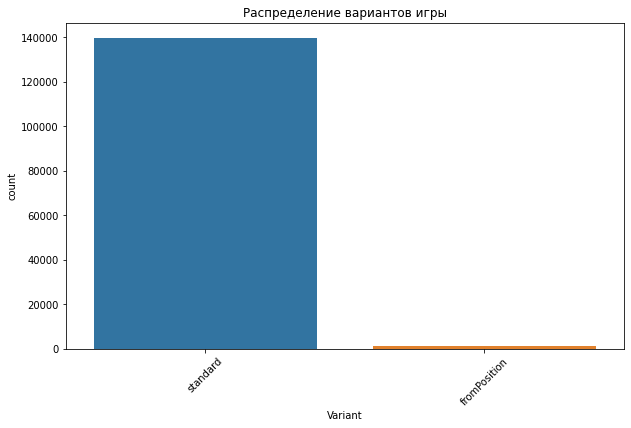

In [340]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, x='Variant', order=df_1['Variant'].value_counts().index)
plt.title('Распределение вариантов игры')
plt.xticks(rotation=45)
plt.show()

In [341]:
# 3.2. Контроль времени партии(Speed).

In [342]:
# Группировка по 'Speed' и подсчет количества
speed_counts = df_1['Speed'].value_counts()

# Расчет процентов
total_speeds = speed_counts.sum()
speed_percentages = (speed_counts / total_speeds) * 100
speed_percentages = round(speed_percentages, 0)

# Создание DataFrame с количеством и процентами
top_speeds = pd.DataFrame({
    'Count': speed_counts,
    'Percentage': speed_percentages
})

In [343]:
top_speeds

,Count,Percentage
blitz,37873,27.0
rapid,33303,24.0
bullet,31291,22.0
classical,29591,21.0
ultraBullet,8734,6.0


In [344]:
# blitz - от 3-х до 10 минут.
# rapid - от 10 до 60 минут.
# bullet - менее 3-х минут.
# classical - от 60 минут до нескольких часов.
# ultraBullet - менее 1-ой минуты.

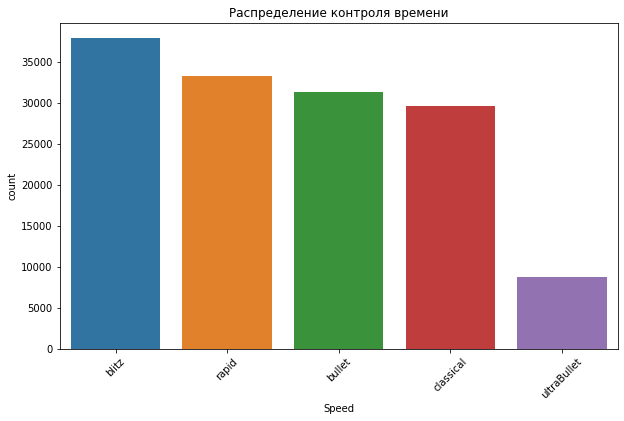

In [345]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, x='Speed', order=df_1['Speed'].value_counts().index)
plt.title('Распределение контроля времени')
plt.xticks(rotation=45)
plt.show()

In [346]:
# 3.3. Код дебюта по системе ECO (Opening_ECO)

In [347]:
# Определяем количество уникальных дебютов
unique_openings_count = df_1['Opening_ECO'].nunique()

In [348]:
unique_openings_count

489

In [349]:
# Найдем самые популярные дебюты и их процент в общей доле.

# Подсчет количества дебютов
opening_counts = df_1['Opening_ECO'].value_counts()

# Расчет процентов
total_openings = opening_counts.sum()
opening_percentages = (opening_counts / total_openings) * 100
opening_percentages = round(opening_percentages, 0)

# Создание DataFrame с количеством и процентами
top_openings = pd.DataFrame({
    'Count': opening_counts,
    'Percentage': opening_percentages
})

In [350]:
top_openings

,Count,Percentage
A00,6555,5.0
A04,4244,3.0
A45,3713,3.0
A40,3268,2.0
A05,3193,2.0
...,...,...
E96,1,0.0
E89,1,0.0
D67,1,0.0
A76,1,0.0


In [351]:
# Наиболее часто встречающиеся дебюты:

# A00 (5 %)  - "неопределенные дебюты". 

# A04 (3%) - дебют известный как "Скандинавская защита", начинается с хода пешки на королевском фланге
# и стремится быстро развивать фигуры, чтобы контролировать центр. 
# Этот дебют обычно выбирают игроки, которые хотят атаковать и не боятся рискованных позиций.

# A45 (3%) - дебют, который называется "Защита Оуэна", начинается с хода пешкой на королевском фланге, 
# но сосредоточен на более медленном и стратегическом раскрытии фигур. 
# Игроки, использующие этот дебют, часто стремятся к созданию сложной позиции и могут играть на противостоянии сопернику, 
# ожидая, когда тот сделает ошибку.

In [352]:
# 4. Анализ числовых переменных. 

In [353]:
# 4.1. Выведем описательную статистику.
df_1[['White_Mistake', 'Black_Mistake', 'White_Blunder', 'Black_Blunder']].describe()

,White_Mistake,Black_Mistake,White_Blunder,Black_Blunder
count,140792.000000,140792.000000,140792.000000,140792.000000
mean,1.177503,1.192397,1.697050,1.693271
std,1.307709,1.301948,1.929795,1.903644
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000
max,23.000000,21.000000,53.000000,53.000000


In [354]:
# Вывод: Максимальное значение значительно превышает 75-й процентиль (Q3), это может указывать на наличие выбросов.

In [355]:
# 4.2. Находим выбросы

In [356]:
# Находим выбросы по столбцу 'White_Mistake'
# Вычисление Q1 и Q3
Q1_1 = df_1['White_Mistake'].quantile(0.25)
Q3_1 = df_1['White_Mistake'].quantile(0.75)

# Вычисление IQR
IQR_1 = Q3_1 - Q1_1

# 3. Определение границ для выбросов
lower_bound_1 = Q1_1 - 1.5 * IQR_1
upper_bound_1 = Q3_1 + 1.5 * IQR_1

# 4. Подсчет количества выбросов
outliers_1 = df_1[(df_1['White_Mistake'] < lower_bound_1) | (df_1['White_Mistake'] > upper_bound_1)]
number_of_outliers_1 = outliers_1.shape[0]

# Печать результата
print(f"Количество выбросов в столбце 'White_Mistake': {number_of_outliers_1}")

Количество выбросов в столбце 'White_Mistake': 1214


In [357]:
# Находим выбросы по столбцу 'Black_Mistake'
# Вычисление Q1 и Q3
Q1_2 = df_1['Black_Mistake'].quantile(0.25)
Q3_2 = df_1['Black_Mistake'].quantile(0.75)

# Вычисление IQR
IQR_2 = Q3_2 - Q1_2

# 3. Определение границ для выбросов
lower_bound_2 = Q1_2 - 1.5 * IQR_2
upper_bound_2 = Q3_2 + 1.5 * IQR_2

# 4. Подсчет количества выбросов
outliers_2 = df_1[(df_1['Black_Mistake'] < lower_bound_2) | (df_1['Black_Mistake'] > upper_bound_2)]
number_of_outliers_2 = outliers_2.shape[0]

# Печать результата
print(f"Количество выбросов в столбце 'Black_Mistake': {number_of_outliers_2}")

Количество выбросов в столбце 'Black_Mistake': 1166


In [358]:
# Находим выбросы по столбцу 'White_Blunder'
# Вычисление Q1 и Q3
Q1_3 = df_1['White_Blunder'].quantile(0.25)
Q3_3 = df_1['White_Blunder'].quantile(0.75)

# Вычисление IQR
IQR_3 = Q3_3 - Q1_3

# 3. Определение границ для выбросов
lower_bound_3 = Q1_3 - 1.5 * IQR_3
upper_bound_3 = Q3_3 + 1.5 * IQR_3

# 4. Подсчет количества выбросов
outliers_3 = df_1[(df_1['White_Blunder'] < lower_bound_3) | (df_1['White_Blunder'] > upper_bound_3)]
number_of_outliers_3 = outliers_3.shape[0]

# Печать результата
print(f"Количество выбросов в столбце 'White_Blunder': {number_of_outliers_3}")

Количество выбросов в столбце 'White_Blunder': 6787


In [359]:
# Находим выбросы по столбцу 'Black_Blunder'
# Вычисление Q1 и Q3
Q1_4 = df_1['Black_Blunder'].quantile(0.25)
Q3_4 = df_1['Black_Blunder'].quantile(0.75)

# Вычисление IQR
IQR_4 = Q3_4 - Q1_4

# 3. Определение границ для выбросов
lower_bound_4 = Q1_4 - 1.5 * IQR_4
upper_bound_4 = Q3_4 + 1.5 * IQR_4

# 4. Подсчет количества выбросов
outliers_4 = df_1[(df_1['Black_Blunder'] < lower_bound_4) | (df_1['Black_Blunder'] > upper_bound_4)]
number_of_outliers_4 = outliers_4.shape[0]

# Печать результата
print(f"Количество выбросов в столбце 'Black_Blunder': {number_of_outliers_4}")

Количество выбросов в столбце 'Black_Blunder': 6519


In [360]:
# Удалим выбросы из основного датафрейма.

In [361]:
# Объединяем все выбросы в один DataFrame
all_outliers = pd.concat([outliers_1, outliers_2, outliers_3, outliers_4]).drop_duplicates()

In [363]:
all_outliers.shape

(9970, 10)

In [365]:
# Удаляем выбросы из основного DataFrame
df_1 = df_1[~df_1.index.isin(all_outliers.index)]

In [366]:
df_1.shape

(130822, 10)

In [374]:
# 4.3. Выведем описательную статистику после удаления выбросов.
df_1[['White_Mistake', 'Black_Mistake', 'White_Blunder', 'Black_Blunder']].describe()

,White_Mistake,Black_Mistake,White_Blunder,Black_Blunder
count,130822.000000,130822.000000,130822.000000,130822.000000
mean,1.068452,1.084076,1.363043,1.367247
std,1.171845,1.167761,1.364111,1.351603
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000
max,10.000000,9.000000,23.000000,23.000000


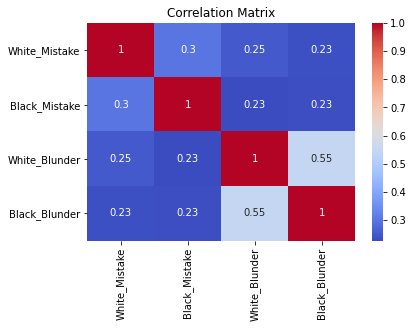

In [375]:
#  4.4. Рассмотрим корреляцию между числовыми переменными.
correlation_matrix = df_1[['White_Mistake', 'Black_Mistake', 'White_Blunder', 'Black_Blunder']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [376]:
# 4.3. Распределение ошибок белого игрока
white_mistake_count = df_1['White_Mistake'].value_counts()

In [377]:
white_mistake_count

0     53148
1     39066
2     22380
3     10575
4      4125
5      1471
6        37
7        14
8         4
10        1
9         1
Name: White_Mistake, dtype: int64

In [378]:
# 4.4. Распределение ошибок черного игрока
black_mistake_count = df_1['Black_Mistake'].value_counts()

In [379]:
black_mistake_count

0    51513
1    40306
2    22828
3    10487
4     4148
5     1471
6       45
7       14
8        7
9        3
Name: Black_Mistake, dtype: int64

In [380]:
# 4.5. Распределение грубых ошибок белого игрока
white_blunder_count = df_1['White_Blunder'].value_counts()

In [381]:
white_blunder_count

0     43328
1     37782
2     24461
3     14032
4      7301
5      3595
6       141
7        86
8        38
9        33
11        9
10        9
12        3
13        2
23        1
14        1
Name: White_Blunder, dtype: int64

In [382]:
# 4.6. Распределение грубых ошибок черного игрока
black_blunder_count = df_1['Black_Blunder'].value_counts()

In [383]:
black_blunder_count

0     42176
1     38789
2     25024
3     13840
4      7170
5      3513
6       136
7        72
8        46
9        24
10       17
12        6
11        6
23        1
15        1
14        1
Name: Black_Blunder, dtype: int64

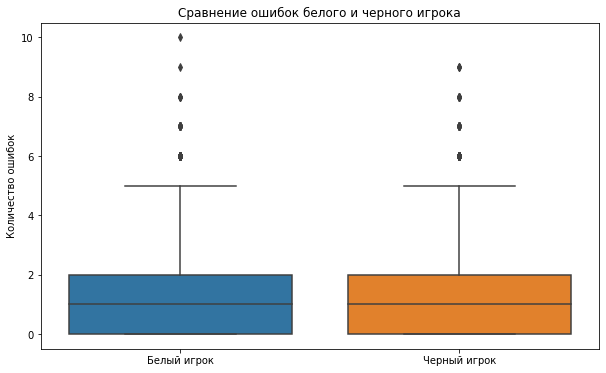

In [384]:
# 4.6. Коробчатая диаграмма для сравнения ошибок
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_1[['White_Mistake', 'Black_Mistake']])
plt.title('Сравнение ошибок белого и черного игрока')
plt.ylabel('Количество ошибок')
plt.xticks([0, 1], ['Белый игрок', 'Черный игрок'])
plt.show()

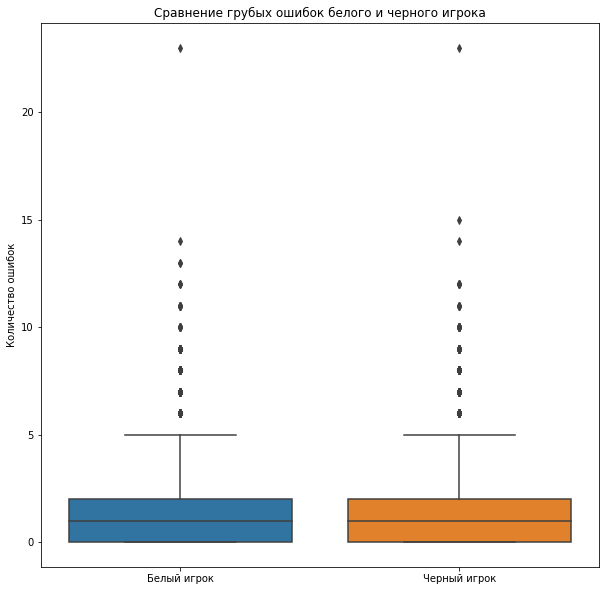

In [385]:
# 4.7. Коробчатая диаграмма для сравнения грубых ошибок
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_1[['White_Blunder', 'Black_Blunder']])
plt.title('Сравнение грубых ошибок белого и черного игрока')
plt.ylabel('Количество ошибок')
plt.xticks([0, 1], ['Белый игрок', 'Черный игрок'])
plt.show()

In [387]:
# 5. Узнаем количество партий, сыгранных без ошибок для белых и черных игроков

In [388]:
# количество партий без ошибок для белых игроков.
no_errors_white = df_1.query("White_Mistake == 0 and White_Blunder == 0")

In [389]:
count_no_errors_white = no_errors_white.shape[0]

In [390]:
# количество партий без ошибок для черных игроков.
no_errors_black = df_1.query("Black_Mistake == 0 and Black_Blunder == 0")

In [391]:
count_no_errors_black = no_errors_black.shape[0]

In [392]:
print(f"Количество партий без ошибок у белых: {count_no_errors_white}")
print(f"Количество партий без ошибок у черных: {count_no_errors_black}")

Количество партий без ошибок у белых: 24443
Количество партий без ошибок у черных: 22232


In [393]:
# Узнаем процент партий без ошибок у белых и черных в общем объеме

In [394]:
total_games = df_1.shape[0]

In [395]:
total_games

130822

In [396]:
# Вычисление процента безошибочных партий у белых
percentage_no_errors_white = (count_no_errors_white / total_games) * 100

In [397]:
# Вычисление процента безошибочных партий у черных
percentage_no_errors_black = (count_no_errors_black / total_games) * 100

In [398]:
print(f"Процент партий без ошибок у белых: {percentage_no_errors_white:.2f}%")
print(f"Процент партий без ошибок у черных: {percentage_no_errors_black:.2f}%")

Процент партий без ошибок у белых: 18.68%
Процент партий без ошибок у черных: 16.99%


In [399]:
# 6. Узнаем были ли такие партиии, где ни белые, ни черные не совершили ни одной ошибки.

In [400]:
no_errors_white_and_black = df_1.query("White_Mistake == 0 and White_Blunder == 0 and Black_Mistake == 0 and Black_Blunder == 0")

In [401]:
count_no_errors_white_and_black = no_errors_white_and_black.shape[0]

In [402]:
print(f"Количество партий, где ни белые, ни черные не совершили ни одной ошибки.: {count_no_errors_white_and_black}")

Количество партий, где ни белые, ни черные не совершили ни одной ошибки.: 5174


In [403]:
# Вычисление процента безошибочных партий у белых и черных одновременно
percentage_no_errors_white_and_black = (count_no_errors_white_and_black / total_games) * 100

In [404]:
print(f"Процент партий, где ни белые, ни черные не совершили ни одной ошибки: {percentage_no_errors_white_and_black:.2f}%")

Процент партий, где ни белые, ни черные не совершили ни одной ошибки: 3.95%


In [405]:
# 7. Исследуем медиану общего количества ошибок.

In [406]:
# Сложим все ошибки для одной партии
df_1['Total_Mistakes'] = df_1['White_Mistake'] + df_1['Black_Mistake'] + df_1['White_Blunder'] + df_1['Black_Blunder']

In [407]:
# 7.1. Вычислим медиану общего количества ошибок для каждого варианта шахмат (Variant)
median_errors_for_Variant = df_1.groupby('Variant')['Total_Mistakes'].median().reset_index(name='Median_Mistakes')

In [408]:
median_errors_for_Variant

,Variant,Median_Mistakes
0,fromPosition,2
1,standard,4


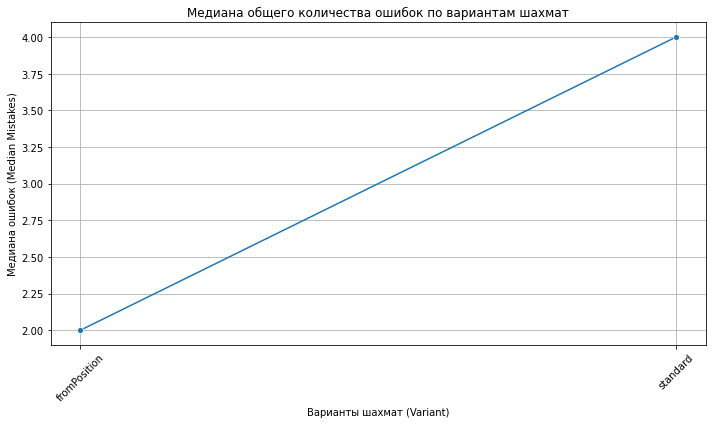

In [451]:
# 2. Построение линейного графика
plt.figure(figsize=(10, 6))
sns.lineplot(data=median_errors_for_Variant, x='Variant', y='Median_Mistakes', marker='o')

# Настройка графика
plt.title('Медиана общего количества ошибок по вариантам шахмат')
plt.xlabel('Варианты шахмат (Variant)')
plt.ylabel('Медиана ошибок (Median Mistakes)')
plt.xticks(rotation=45)
plt.grid()

# Показать график
plt.tight_layout()
plt.show()

In [409]:
# Выводы:

# Медиана ошибок для партий fromPosition (2,5) меньше, чем для партий standard (4,5). Это может указывать на то, 
# что игроки, начиная с заранее заданной позиции, более уверенно принимают решения и делают меньше ошибок, чем игроки 
# в стандартных партиях (они уже имеют представление о позиции и возможных ходах, 
# что позволяет им принимать более обоснованные решения.)

# Игроки же, которые начинают с традиционной позиции, сталкиваются с большим количеством неопределенностей и сложностей, 
# что приводит к большему количеству ошибок.

In [410]:
# 7.2. Вычислим медиану общего количества ошибок для каждого контроля времени партии (Speed)
median_errors_for_Speed = df_1.groupby('Speed')['Total_Mistakes'].median().reset_index(name='Median_Mistakes')

In [411]:
median_errors_for_Speed

,Speed,Median_Mistakes
0,blitz,4
1,bullet,5
2,classical,3
3,rapid,4
4,ultraBullet,7


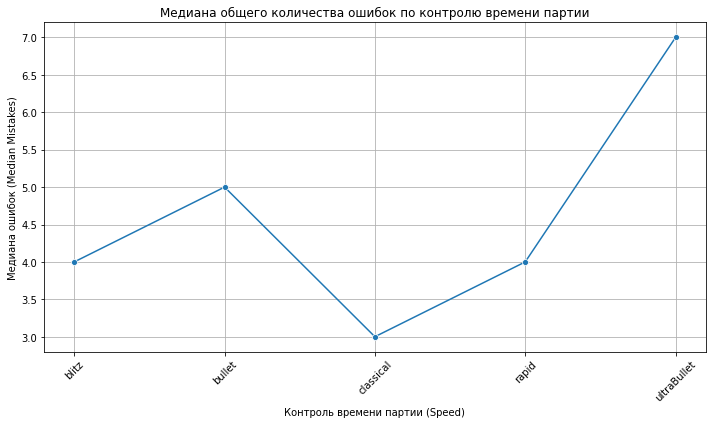

In [450]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=median_errors_for_Speed, x='Speed', y='Median_Mistakes', marker='o')

# Настройка графика
plt.title('Медиана общего количества ошибок по контролю времени партии')
plt.xlabel('Контроль времени партии (Speed)')
plt.ylabel('Медиана ошибок (Median Mistakes)')
plt.xticks(rotation=45)
plt.grid()

# Показать график
plt.tight_layout()
plt.show()

In [412]:
# Выводы:

# Чем меньше времени у игроков, тем больше вероятность ошибок. 
# Это видно из того, что в UltraBullet медиана ошибок значительно выше, чем в других форматах. 
# Игроки в этом формате, вероятно, делают много поспешных ходов, что приводит к большему количеству ошибок.

# Форматы с более длительным контролем времени (Blitz, Classical, Rapid) показывают схожие результаты, что может указывать на то,
#что игроки имеют достаточно времени для обдумывания ходов и, следовательно, делают меньше ошибок.

In [413]:
# 7.3. Вычислим медиану общего количества ошибок для 30 самых популярных дебютов.

In [414]:
# Группируем данные по дебютам и считаем количество партий
top_openings = df_1['Opening_ECO'].value_counts().head(30).index.tolist()

In [415]:
# Фильтруем DataFrame по топ-30 дебютам
filtered_df = df_1[df_1['Opening_ECO'].isin(top_openings)]

In [416]:
filtered_df.shape

(60745, 11)

In [417]:
filtered_df.head(1)

,Game_ID,Variant,Speed,White_Mistake,Black_Mistake,White_Blunder,Black_Blunder,Analysis,Opening_ECO,Winner,Total_Mistakes
4,GC8I3jiq,standard,classical,2,1,2,2,"[{'eval': 17}, {'eval': 18}, {'eval': 23}, {'e...",A15,неизвестно,7


In [418]:
median_errors_for_Opening_ECO = filtered_df.groupby('Opening_ECO')['Total_Mistakes'].median().reset_index(name='Median_Mistakes')

In [419]:
median_errors_for_Opening_ECO

,Opening_ECO,Median_Mistakes
0,A00,6
1,A01,5
2,A04,5
3,A05,5
4,A15,4
5,A40,5
6,A43,5
7,A45,4
8,A46,4
9,B00,5


In [420]:
# Самая большая медиана ошибок среди популярных дебютов в дебюте A00.
# код A00 обозначает "неопределенные дебюты". 
# Это может включать в себя различные нестандартные или редкие ходы, которые не соответствуют более известным дебютам.

In [421]:
# 8. Исследуем столбец Analysis.

# в этом столбце хранятся данные по оценке позиций на шахмаьной доске, которую дает шахматный движок
# число этих оценок зависит от хода игры.

# Eval — это числовое значение, которое показывает, насколько хороша или плоха текущая позиция для одного из игроков. 

# Положительное значение: позиция выгодна для белых.
# Отрицательное значение: позиция выгодна для черных.
# Ноль: позиция сбалансирована, ни одна сторона не имеет явного преимущества.

In [422]:
# 8.1. Найдем среднее значение eval для каждой партии 

# это покажет как оценивалась позиция в партии на протяжении всех ходов.
# была ли позиция преимущественно выгодной для одной из сторон (белых или черных) или же она была сбалансированной.

In [423]:
# Проверка типа данных столбца eval
print(type(df_1['Analysis'].iloc[0]))

<class 'str'>


In [424]:
# Так как тип данных столбца Analysis строка, то необходимо преобразование строки в списки.
df_1['Analysis'] = df_1['Analysis'].apply(ast.literal_eval)

# Извлекаем значения eval из каждого словаря в списке с проверкой наличия ключа
def extract_eval(x):
    return [item['eval'] for item in x if 'eval' in item]

df_1['eval'] = df_1['Analysis'].apply(extract_eval)

# Найдем среднее значение eval для каждого элемента
df_1['avg_eval'] = df_1['eval'].apply(lambda x: sum(x) / len(x) if x else None)

In [425]:
avg_eval_column = df_1['avg_eval']
print(avg_eval_column)

0         186.257576
1         133.000000
2         -45.324324
3         110.714286
4         -21.457143
             ...    
140785    426.886792
140786   -342.734694
140787   -649.375000
140789    320.782609
140791    694.813953
Name: avg_eval, Length: 130822, dtype: float64


In [426]:
df_1.head(1)

,Game_ID,Variant,Speed,White_Mistake,Black_Mistake,White_Blunder,Black_Blunder,Analysis,Opening_ECO,Winner,Total_Mistakes,eval,avg_eval
0,PsevV6VH,standard,classical,1,1,1,1,"[{'eval': 14}, {'eval': 25}, {'eval': 26}, {'e...",A30,white,4,"[14, 25, 26, 23, 16, 39, 32, 44, 51, 89, 90, 8...",186.257576


In [427]:
# Найдем процент выгодных позиций для белых и для черных игроков

# Общее количество партий
total_games = len(df_1)

# Подсчет партий в каждой категории
white_advantage = len(df_1[df_1['avg_eval'] > 0])
black_advantage = len(df_1[df_1['avg_eval'] < 0])
balanced_positions = len(df_1[df_1['avg_eval'] == 0])

# Вычисление процентов
white_advantage_percent = (white_advantage / total_games) * 100
black_advantage_percent = (black_advantage / total_games) * 100
balanced_positions_percent = (balanced_positions / total_games) * 100

# Вывод результатов
print(f"Процент партий, где преимущественно была выгодная позиция для белых: {white_advantage_percent:.2f}%")
print(f"Процент партий, где преимущественно была выгодная позиция для черных: {black_advantage_percent:.2f}%")
print(f"Процент сбалансированных позиций: {balanced_positions_percent:.2f}%")


Процент партий, где преимущественно была выгодная позиция для белых: 55.77%
Процент партий, где преимущественно была выгодная позиция для черных: 44.19%
Процент сбалансированных позиций: 0.03%


In [428]:
# 8.3. Найдем процент партий, где выиграли белые, несмотря на то, что средняя оценка позиции (avg_eval) была в пользу черных,
# и наоборот, партии, где выиграли черные, несмотря на приемущество белых.

# положительное число - приемущество белых
# отрицательное число - приемущество черных.

In [429]:
# Фильтрация партий, где белые выиграли, несмотря на преимущество черных
white_wins_black_advantage = df_1.query("Winner == 'white' and avg_eval < 0")

In [430]:
white_wins_black_advantage.shape

(6332, 13)

In [431]:
# Фильтрация партий, где черные выиграли, несмотря на преимущество белых
black_wins_white_advantage = df_1.query("Winner == 'black' and avg_eval > 0")

In [432]:
black_wins_white_advantage.shape

(9102, 13)

In [433]:
# Число партий, где игроку получилось резко развернуть ход игры в свою пользу, несмотря на приемущество противника в ходе игры.
result = pd.concat([white_wins_black_advantage, black_wins_white_advantage], ignore_index=True)

In [434]:
result.shape

(15434, 13)

In [435]:
# Общее количество партий
total_games = len(df_1)

In [436]:
# Количество партий, соответствующих критериям
count_result = len(result)

In [437]:
percentage = count_result / total_games * 100

In [438]:
percentage

11.797709865313173

In [439]:
percentage = round(percentage, 0)

In [440]:
print("Общее количество партий:", total_games)
print("Количество партий, где белые выиграли с преимуществом черных или черные выиграли с преимуществом белых:", count_result)
print(f"Процент таких партий в общем объеме: {percentage:.2f} %")  # Используем f-строку для форматирования

Общее количество партий: 130822
Количество партий, где белые выиграли с преимуществом черных или черные выиграли с преимуществом белых: 15434
Процент таких партий в общем объеме: 12.00 %


In [441]:
# Подсчет количества оценок в каждом списке
df_1['eval_count'] = df_1['eval'].apply(len)

In [442]:
df_1.head(1)

,Game_ID,Variant,Speed,White_Mistake,Black_Mistake,White_Blunder,Black_Blunder,Analysis,Opening_ECO,Winner,Total_Mistakes,eval,avg_eval,eval_count
0,PsevV6VH,standard,classical,1,1,1,1,"[{'eval': 14}, {'eval': 25}, {'eval': 26}, {'e...",A30,white,4,"[14, 25, 26, 23, 16, 39, 32, 44, 51, 89, 90, 8...",186.257576,66


In [443]:
# 8.4. Посчитаем среднее количество оценок Lichess движка для каждой разновидности Speed (контроль времени партии)

In [444]:
# Подсчет количества оценок в каждом списке
df_1['eval_count'] = df_1['eval'].apply(len)

# Группировка по Speed и вычисление среднего количества оценок
average_eval_count = df_1.groupby('Speed')['eval_count'].mean().reset_index(name='average_count')

# Выводим результат
print("\nСреднее количество оценок для каждой разновидности Speed:")
print(average_eval_count)


Среднее количество оценок для каждой разновидности Speed:
         Speed  average_count
0        blitz      81.879618
1       bullet      78.385264
2    classical      73.458770
3        rapid      78.022850
4  ultraBullet      60.586950


In [460]:
# 8.3. Сравним как распределяются значений eval в партиях с наибольшим и наименьшим числом ошибок.

df_2 = df_1[['Total_Mistakes','eval']]

In [461]:
df_2 = df_2.sort_values("Total_Mistakes", ascending=False)

In [462]:
df_2

,Total_Mistakes,eval
127711,55,"[14, 38, 11, 20, 5, 15, 8, 23, -8, -2, -12, -1..."
131968,37,"[0, 0, 0, 0, -12, 0, -25, -18, -19, -25, -34, ..."
62415,35,"[17, 24, -7, 0, -11, 0, 0, -6, 0, 0, 0, 0, 0, ..."
135366,33,"[17, 61, 0, 28, -94, 12, 13, 17, 4, 6, 0, 28, ..."
133983,31,"[36, 37, 34, 24, 27, 33, 34, 54, 41, 39, -33, ..."
...,...,...
62891,0,"[0, 9, -2, 0, -9, -1, 3, 25, 9, 19, 25, 37, 24..."
130993,0,"[17, 19, 18, 11, 12, 23, 18, 14, 14, 11, 12, 8..."
115000,0,"[12, 25, 21, 26, 18, 24, 10, 33, 0, 0, 0, 26, ..."
94136,0,"[14, 18, 12, 25, 6, 6, 0, 13, 6, 0, 3, 6, 0, 7..."


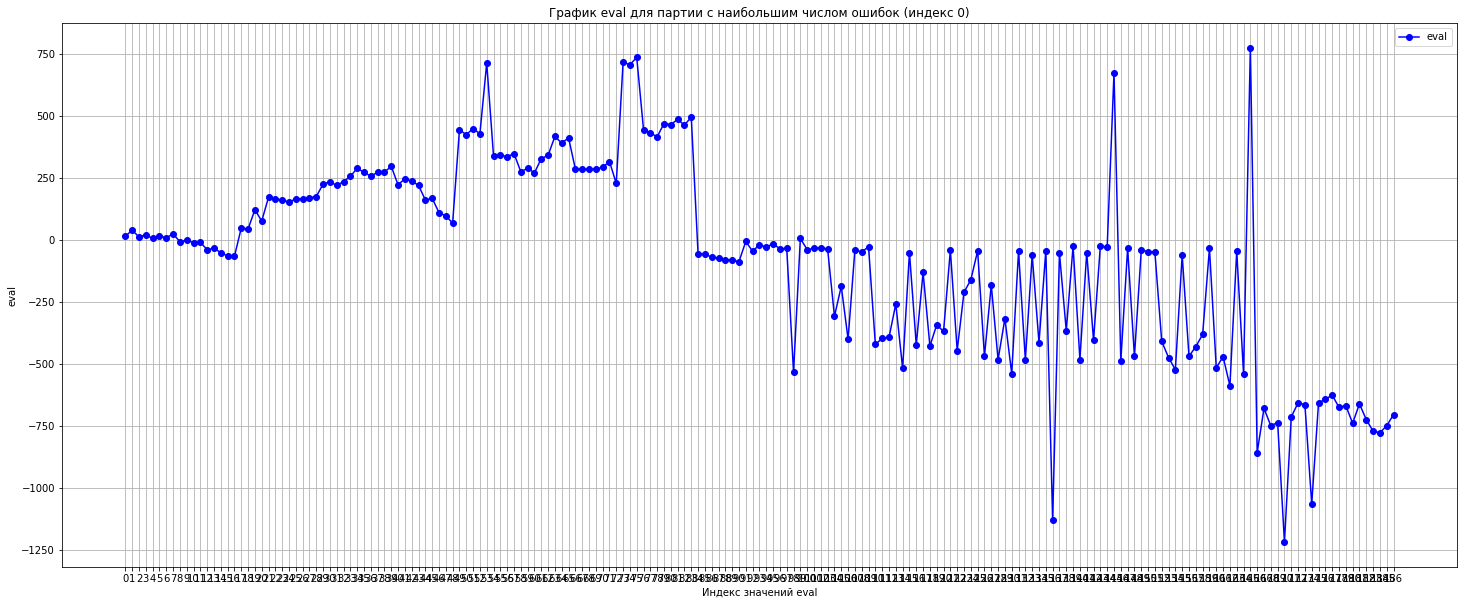

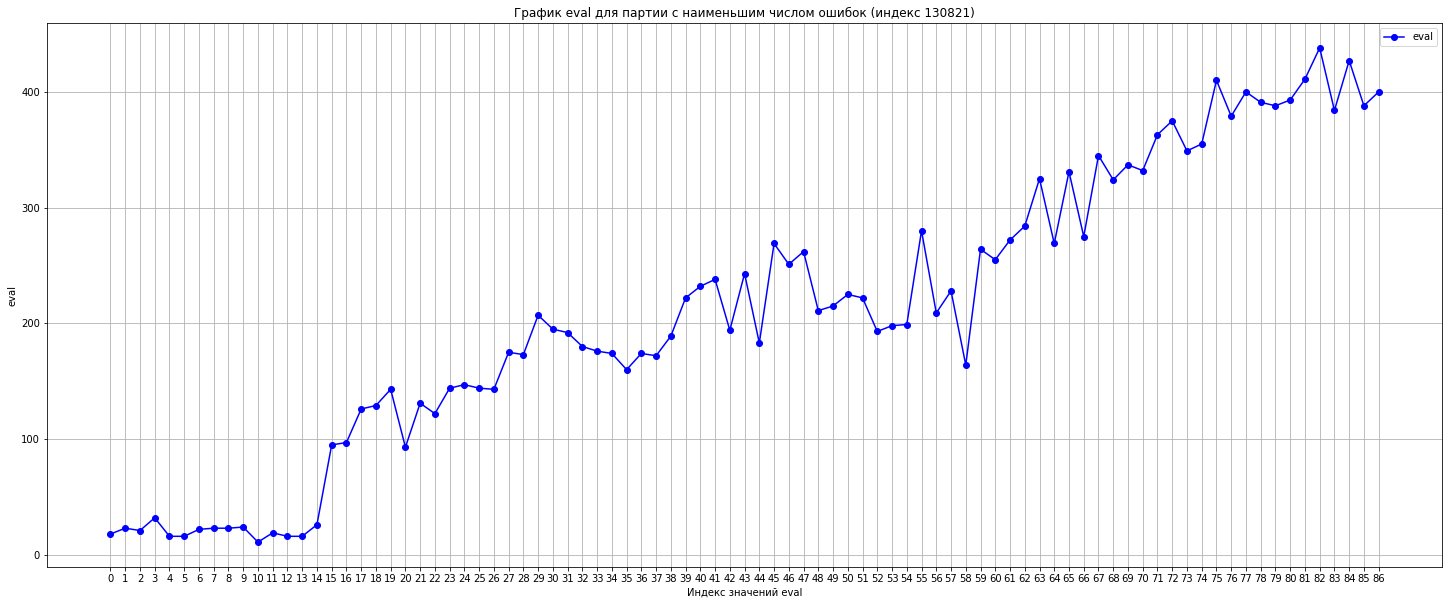

In [463]:
# Выбираем первую строку
row_index = 0  # Индекс первой строки
eval_values = df_2['eval'].iloc[row_index]

# Создаем массив индексов для значений eval
index_values = list(range(len(eval_values)))

# Построение графика
plt.figure(figsize=(25, 10))
plt.plot(index_values, eval_values, marker='o', color='blue', label='eval')
plt.title(f'График eval для партии с наибольшим числом ошибок (индекс {row_index})')
plt.xlabel('Индекс значений eval')
plt.ylabel('eval')
plt.xticks(index_values)  # Устанавливаем метки по оси X
plt.grid()
plt.legend()
plt.show()


# Выбираем последнюю строку
row_index = len(df_2) - 1  # Индекс последней строки
eval_values = df_2['eval'].iloc[row_index]

# Создаем массив индексов для значений eval
index_values = list(range(len(eval_values)))

# Построение графика
plt.figure(figsize=(25, 10))
plt.plot(index_values, eval_values, marker='o', color='blue', label='eval')
plt.title(f'График eval для партии с наименьшим числом ошибок (индекс {row_index})')
plt.xlabel('Индекс значений eval')
plt.ylabel('eval')
plt.xticks(index_values)  # Устанавливаем метки по оси X
plt.grid()
plt.legend()
plt.show()

In [464]:
# Вывод: Таким образом, мы прослеживаем закономерность между количеством ошибок и неоднородностью графика eval.
# Чем больше ошибок, тем более неоднароден график eval, тем более резкие перепады между приемуществами белых и черных.